In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part (a)-(b)

- European Call Price (PS2_Q3 Closed-form Binomial): 8.72009
- European Call Price (PS4_Q1 Binomial Tree): 8.72009  
    - Difference: 2.66454e-14
  

- American Call Price: 8.7201  
    - Early exercise premium (AC - EC): 3.82876e-06  

## Part(c)

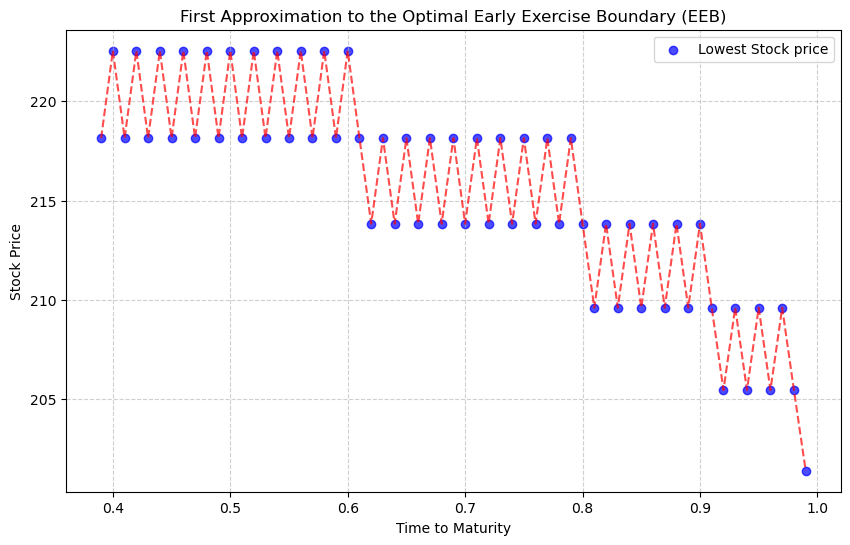

In [39]:
# Load the CSV file with proper handling of file paths
file_path = r"C:\Users\76721\Desktop\UCLA\Winter-2025\Derivative Markets-406\Week 5\PS4\PS4\exercise_boundary_part_c.csv"
eeb1 = pd.read_csv(file_path, encoding="utf-8")

# Plot the first approximation to the optimal early exercise boundary (EEB)
plt.figure(figsize=(10, 6))

# Scatter plot for better visualization of discrete points
plt.scatter(eeb1["Time"], eeb1["Price"], label="Lowest Stock price", color="blue", alpha=0.7)

# Line plot to connect points
plt.plot(eeb1["Time"], eeb1["Price"], linestyle="--", color="red", alpha=0.7)

# Labels and title
plt.xlabel("Time to Maturity")
plt.ylabel("Stock Price")
plt.title("First Approximation to the Optimal Early Exercise Boundary (EEB)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

- Discrete Approximation:
    - The up-and-down zigzag behavior arise from evaluating the EEB at a finite grid of times and states, which casuing the numerical artifacts "jumps".
- General Downward Trend:
    -  As maturity near, the early-exercise stock-price level at which it becomes optimal shifts downward.This because as the option get closer to expiration, its remaining time value diminishes, then waiting confers less and less potential upside.

## Part(d)

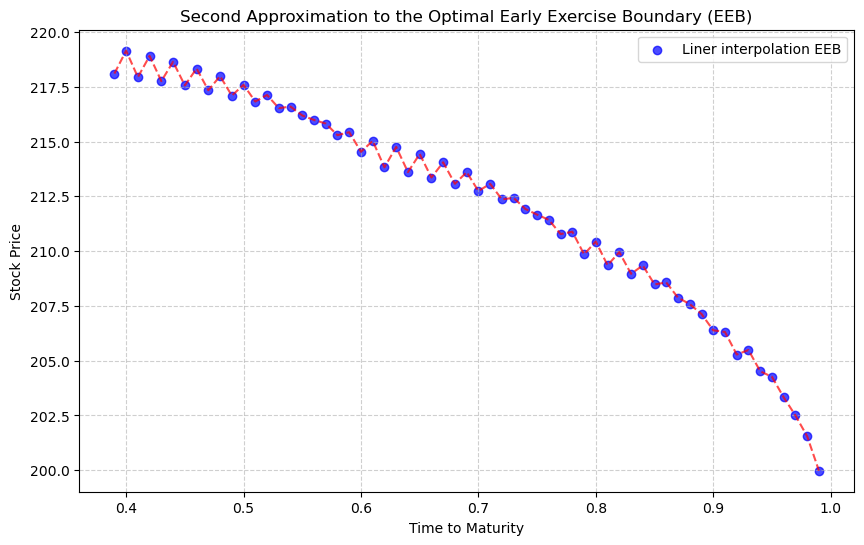

In [41]:
# Load the CSV file with proper handling of file paths
file_path = r"C:\Users\76721\Desktop\UCLA\Winter-2025\Derivative Markets-406\Week 5\PS4\PS4\exercise_boundary_part_d.csv"
eeb1 = pd.read_csv(file_path, encoding="utf-8")

# Plot the first approximation to the optimal early exercise boundary (EEB)
plt.figure(figsize=(10, 6))

# Scatter plot for better visualization of discrete points
plt.scatter(eeb1["Time"], eeb1["Price"], label="Liner interpolation EEB", color="blue", alpha=0.7)

# Line plot to connect points
plt.plot(eeb1["Time"], eeb1["Price"], linestyle="--", color="red", alpha=0.7)

# Labels and title
plt.xlabel("Time to Maturity")
plt.ylabel("Stock Price")
plt.title("Second Approximation to the Optimal Early Exercise Boundary (EEB)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

- With linear interpolation, the curve become smoother.
- As j increase to maturity, the optimal early exercise boundry goes to 200. Given the slope of decreasing is more steeper, I also tried to use 500 time steps, the optimal early exercise boundry still goes to 200.I would like to say that this linear interpolated EEB approach a limit at 200.
- As j decrese, it seems to be more flattern and appear to approach an asymptotic upper bound.

## Part(e)

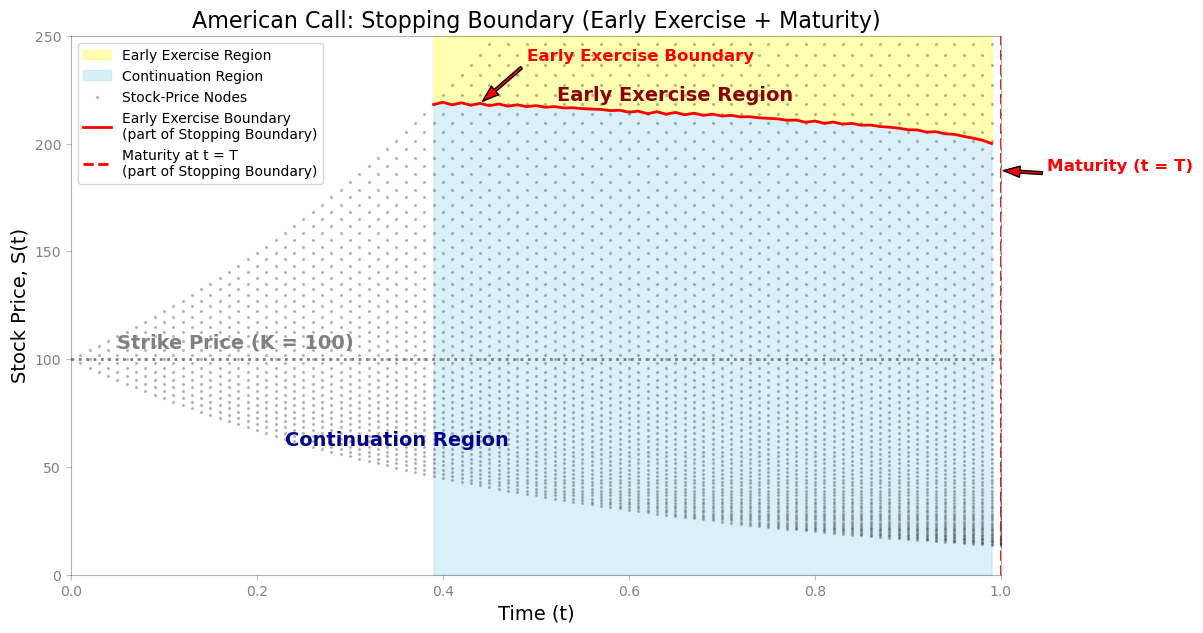

In [58]:

# --------------------------------------------------
# 1) LOAD THE BOUNDARY AND STOCK PRICE DATA
# --------------------------------------------------
boundary_file = r"C:\Users\76721\Desktop\UCLA\Winter-2025\Derivative Markets-406\Week 5\PS4\PS4\exercise_boundary_part_d.csv"
stock_file    = r"C:\Users\76721\Desktop\UCLA\Winter-2025\Derivative Markets-406\Week 5\PS4\PS4\stock_prices.csv"

eeb = pd.read_csv(boundary_file).dropna().sort_values('Time')
stock_points = pd.read_csv(stock_file)

time_vals = eeb["Time"].values
boundary  = eeb["Price"].values

# --------------------------------------------------
# 2) SET PLOT PARAMETERS
# --------------------------------------------------
T      = 1.0       # Maturity
K      = 100.0     # Strike
S_max  = 250       # Upper bound for the stock axis
fig, ax = plt.subplots(figsize=(12, 7))

# Make spines & ticks a bit subdued
for spine in ax.spines.values():
    spine.set_alpha(0.3)
ax.tick_params(colors='gray')
for tick in ax.get_xticklines()+ax.get_yticklines():
    tick.set_alpha(0.5)

# --------------------------------------------------
# 3) PLOT EARLY EXERCISE VS CONTINUATION REGIONS
# --------------------------------------------------
ax.fill_between(time_vals, boundary, S_max, 
                color='yellow', alpha=0.3, label='Early Exercise Region')
ax.fill_between(time_vals, 0, boundary, 
                color='skyblue', alpha=0.3, label='Continuation Region')

# --------------------------------------------------
# 4) PLOT STOCK‐PRICE NODES
# --------------------------------------------------
ax.scatter(stock_points['Time'], stock_points['StockPrice'], 
           s=2, c='black', alpha=0.2, label='Stock‐Price Nodes')

# --------------------------------------------------
# 5) PLOT STOPPING BOUNDARY (EARLY + MATURITY)
# --------------------------------------------------
# (a) Early‐exercise boundary for t < T
ax.plot(time_vals, boundary, 'r-', lw=2, label='Early Exercise Boundary\n(part of Stopping Boundary)')
# (b) Maturity line at t = T
ax.axvline(x=T, color='red', linestyle='--', lw=2, 
           label='Maturity at t = T\n(part of Stopping Boundary)')

# Also plot the strike‐price line (gray dotted)
ax.axhline(y=K, color='gray', linestyle=':', lw=2)

# --------------------------------------------------
# 6) ANNOTATIONS
# --------------------------------------------------
# Text in the upper region
ax.text(0.65, 220, "Early Exercise Region", 
        color='darkred', fontsize=14, weight='bold', ha='center')
# Text in the lower region
ax.text(0.35, 60, "Continuation Region", 
        color='darkblue', fontsize=14, weight='bold', ha='center')

# Arrow to the early‐exercise boundary
idx = 5  # choose an index for annotation
boundary_point_time  = time_vals[idx]
boundary_point_price = boundary[idx]
ax.annotate("Early Exercise Boundary",
            xy=(boundary_point_time, boundary_point_price),
            xytext=(boundary_point_time + 0.05, boundary_point_price + 20),
            arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
            fontsize=12, color='red', weight='bold')

# Arrow to the maturity line
ax.annotate("Maturity (t = T)",
            xy=(T, S_max * 0.75),
            xytext=(T + 0.05, S_max * 0.75),
            arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
            fontsize=12, color='red', weight='bold')

# Label the strike line
ax.text(0.05, K+5, "Strike Price (K = 100)",
        color='gray', fontsize=14, weight='bold')

# Optionally, show a legend
ax.legend(loc='upper left')

# --------------------------------------------------
# 7) FINAL TOUCHES
# --------------------------------------------------
ax.set_title("American Call: Stopping Boundary (Early Exercise + Maturity)", fontsize=16)
ax.set_xlabel("Time (t)", fontsize=14)
ax.set_ylabel("Stock Price, S(t)", fontsize=14)
ax.set_xlim(0, T)
ax.set_ylim(0, S_max)

plt.show()


## part(f)

- Currently, our early exercise boundary (EEB) is estimated using linear interpolation between two adjacent nodes where the net value changes sign. However, there is no guarantee that the true relationship between stock price and net value is strictly linear. In fact, it could be nonlinear due to factors like volatility, dividends, and time value. This observation naturally suggests experimenting with higher‐order interpolation—such as quadratic or other polynomial approximations—to potentially obtain a more accurate estimate of the EEB.

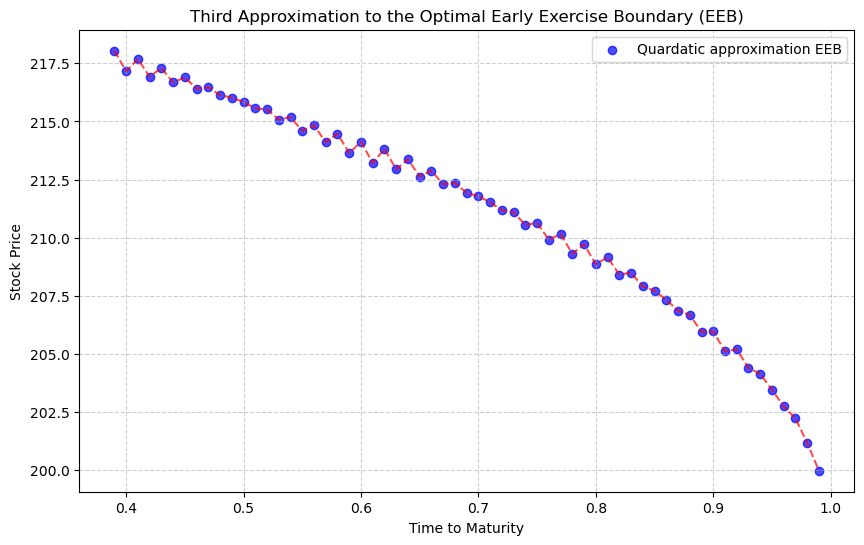

In [43]:
# Load the CSV file with proper handling of file paths
file_path = r"C:\Users\76721\Desktop\UCLA\Winter-2025\Derivative Markets-406\Week 5\PS4\PS4\exercise_boundary_part_f.csv"
eeb1 = pd.read_csv(file_path, encoding="utf-8")

# Plot the first approximation to the optimal early exercise boundary (EEB)
plt.figure(figsize=(10, 6))

# Scatter plot for better visualization of discrete points
plt.scatter(eeb1["Time"], eeb1["Price"], label="Quardatic approximation EEB", color="blue", alpha=0.7)

# Line plot to connect points
plt.plot(eeb1["Time"], eeb1["Price"], linestyle="--", color="red", alpha=0.7)

# Labels and title
plt.xlabel("Time to Maturity")
plt.ylabel("Stock Price")
plt.title("Third Approximation to the Optimal Early Exercise Boundary (EEB)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

- By using quardatic approximation of EEB, the jumps between each time step get smaller, which make the cuve more smoother.  
- Also, the EEB converges to 200 as j converges to maturity.